# 대리점데이터 

In [7]:
import pandas as pd
user_data = pd.read_csv('data/대리점데이터/user.csv')
customer_data = pd.read_csv('data/대리점데이터/customer_data.csv')

In [8]:
user_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [9]:
user_data.groupby('item_name').agg(sum_price = ('item_price', 'sum'))

,sum_price
item_name,
상 품 n,1400.0
상품 E,500.0
상품 M,1300.0
상품 P,1600.0
상품 S,1900.0
...,...
상품s,3800.0
상품t,2000.0
상품v,2200.0


In [15]:
user_data['item_name'] = user_data['item_name'].str.upper()

In [16]:
user_data['item_name'] = user_data['item_name'].str.replace(' ','')

In [18]:
user_data.groupby('item_name').agg(sum_price = ('item_price', 'sum'))

,sum_price
item_name,
상품A,11700.0
상품B,19000.0
상품C,33900.0
상품D,46000.0
상품E,46000.0
상품F,64200.0
상품G,67200.0
상품H,80800.0
상품I,90000.0


In [23]:
#user_data.groupby('item_name').agg(max_item_price = ('item_price', 'max'),
#                                   min_item_price = ('item_price', 'min'))
item_price = user_data.groupby('item_name', as_index = False).agg(item_price = ('item_price', 'mean'))

In [24]:
drop_item_price = user_data.drop(['item_price'], axis = 1)
drop_item_price.merge(item_price, on = 'item_name')

,purchase_date,item_name,customer_name,item_price
0,2019-06-13 18:02,상품A,김가온,100.0
1,2019-05-11 19:42,상품A,김유찬,100.0
2,2019-04-22 3:09,상품A,김강현,100.0
3,2019-05-18 19:16,상품A,김재준,100.0
4,2019-01-28 10:47,상품A,김태윤,100.0
...,...,...,...,...
2994,2019-02-13 9:17,상품J,김태양,1000.0
2995,2019-01-18 20:25,상품J,김지율,1000.0
2996,2019-06-14 21:48,상품J,김하윤,1000.0
2997,2019-03-25 18:43,상품J,김민서,1000.0


In [6]:
customer_data.head()

,Unnamed: 0,고객이름,지역,등록일
0,0,김 현성,H시,2018-01-04 00:00:00
1,1,김 도윤,E시,42782
2,2,김 지한,A시,2018-01-07 00:00:00
3,3,김 하윤,F시,42872
4,4,김 시온,E시,43127


In [30]:
customer_data['고객이름'] = customer_data['고객이름'].str.replace(' ','')
customer_data.head()

,Unnamed: 0,고객이름,지역,등록일
0,0,김현성,H시,2018-01-04 00:00:00
1,1,김도윤,E시,42782
2,2,김지한,A시,2018-01-07 00:00:00
3,3,김하윤,F시,42872
4,4,김시온,E시,43127


In [38]:
fig_is_serial = customer_data['등록일'].str.isdigit() #str로 되어 있는 것 중 숫자로 표현 된 데이터를 찾습니다.
float_serise_rester = pd.to_timedelta(
    customer_data.loc[fig_is_serial, '등록일'].astype(float), unit ='D')
fromSerial = float_serise_rester + pd.to_datetime('1900/01/01')
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 등록일, dtype: datetime64[ns]

In [41]:
fromString = pd.to_datetime(customer_data.loc[~fig_is_serial, '등록일'])
customer_data['등록일'] = pd.concat([fromString,fromSerial])

In [42]:
customer_data

,Unnamed: 0,고객이름,지역,등록일
0,0,김현성,H시,2018-01-04
1,1,김도윤,E시,2017-02-18
2,2,김지한,A시,2018-01-07
3,3,김하윤,F시,2017-05-19
4,4,김시온,E시,2018-01-29
...,...,...,...,...
195,195,김재희,G시,2017-06-20
196,196,김도영,E시,2018-06-20
197,197,김이안,F시,2017-04-29
198,198,김시현,H시,2019-04-19


In [46]:
#csv
customer_data.to_csv('customer_data_dump1.csv', index = False)

In [47]:
#excel
customer_data.to_excel('customer_data_dump2.xlsx')

# Regression 

In [48]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
boston_dataset = load_boston() # 데이터셋을 불러옵니다. pd.read_csv / pd.read_excel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [53]:
x = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV'])

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [59]:
model = LinearRegression()
model.fit(x_train, y_train) #머신러닝 모델 학습

LinearRegression()

In [60]:
y_test_prediction = model.predict(x_test)

In [66]:
mean_squared_error(y_test, y_test_prediction)

20.869292183770682

In [68]:
round(model.score(x_test, y_test) * 100)

73

# Classification 

In [69]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()
# 1. inputdata와 target data 구분해서 정의합니다.
X = pd.DataFrame(iris_data['data'], columns = iris_data.feature_names)
Y = pd.DataFrame(iris_data['target'], columns = ['class'])

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [76]:
x_train, x_test ,y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [99]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [100]:
y_test_pred = model.predict(x_test)
y_test['pred'] = y_test_pred
y_test[y_test['class'] != y_test['pred']]

,class,pred
119,2,1
133,2,1


In [101]:
test_accuracy = model.score(x_test, y_test['class']) #test 정확도
train_accuracy = model.score(x_train, y_train) # 훈련정확도
print('훈련정확도는', round(train_accuracy * 100), '테스트정확도는', round(test_accuracy * 100))

훈련정확도는 99 테스트정확도는 96


In [102]:
# 7. 모델확인(변수 중요도)
import matplotlib.pyplot as plt
import numpy as np

importance = model.feature_importances_
importance

array([0.01369138, 0.01932901, 0.56067545, 0.40630416])

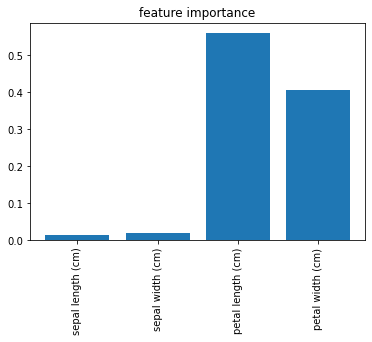

In [103]:
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

## Breast cancer data

In [107]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
Y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [252]:
Breast_cancer_data = DecisionTreeClassifier(max_depth = 8)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Breast_cancer_data.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [253]:
Breast_cancer_data.predict(x_test)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1])

In [254]:
test_accuracy = Breast_cancer_data.score(x_test, y_test) #test 정확도
train_accuracy = Breast_cancer_data.score(x_train, y_train) # 훈련정확도
print('훈련정확도는', train_accuracy, '테스트정확도는', test_accuracy)

훈련정확도는 1.0 테스트정확도는 0.9912280701754386


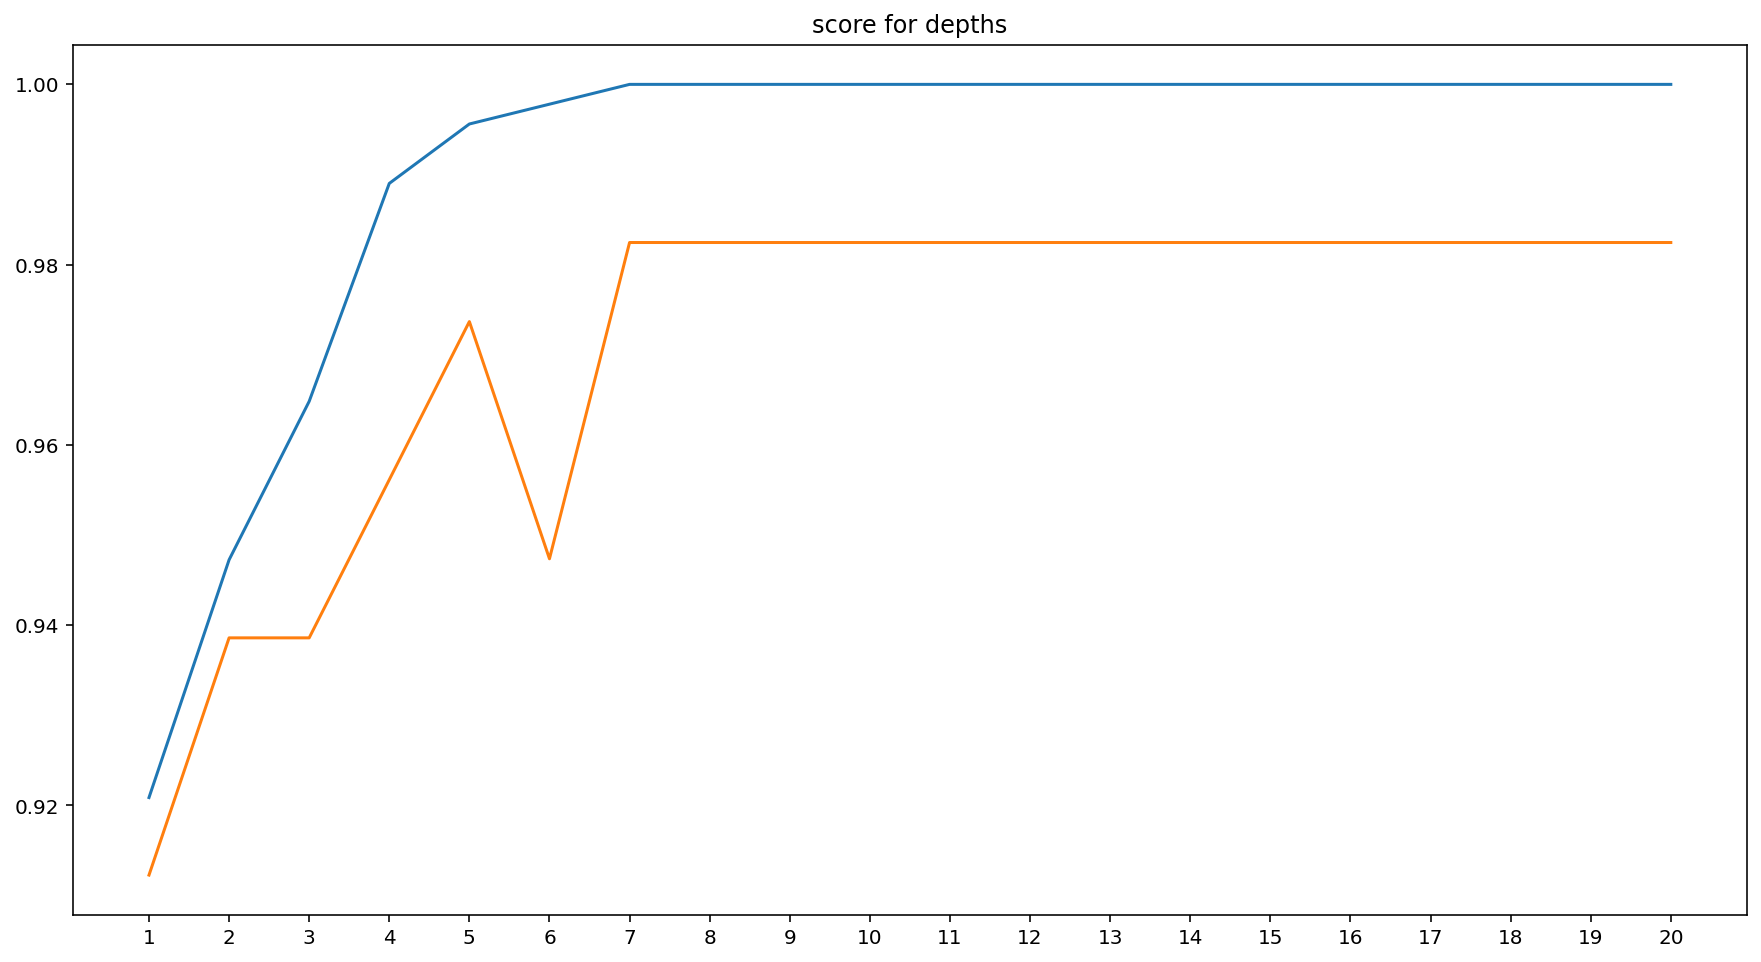

In [261]:
train_score=[]
test_score=[]
for i in range(1,21):
    model=DecisionTreeClassifier(max_depth=i,random_state=4)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

C:\Users\Joo\AppData\Local\Temp\ipykernel_8528\3435090659.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


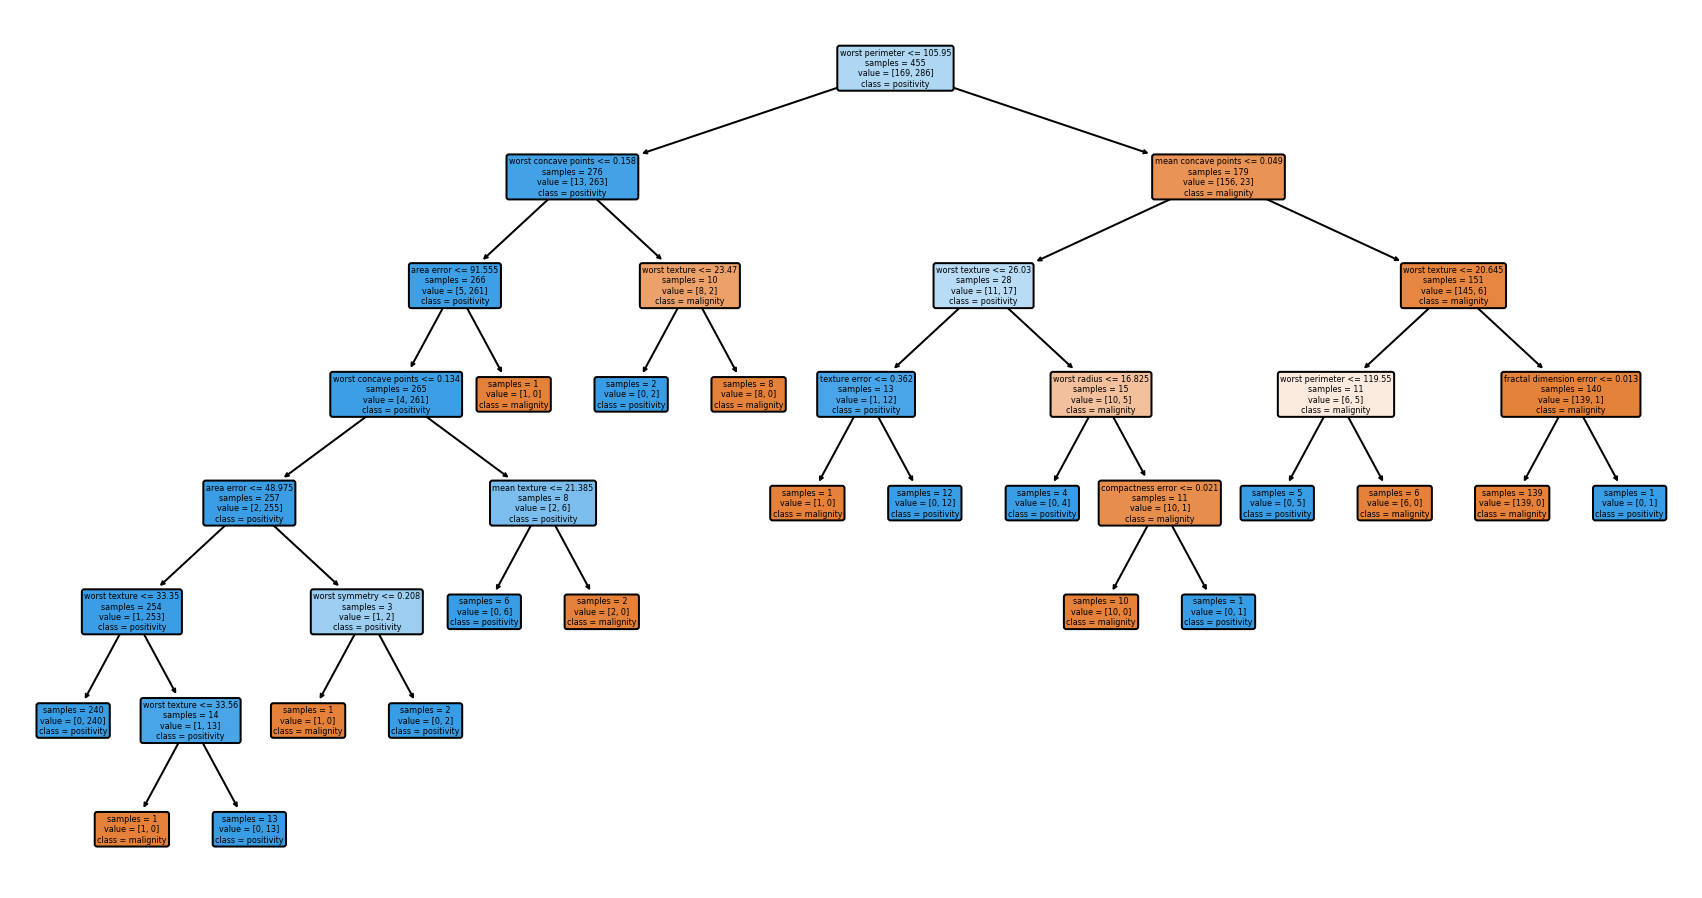

In [258]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model, class_names=["malignity", "positivity"], feature_names=cancer_data.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

## Unsupervised Learning

In [263]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
Y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [266]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [267]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [269]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled

array([[0.43963273, 0.37199865, 0.43611361, ..., 0.54398625, 0.30303628,
        0.17591437],
       [0.39372427, 0.526209  , 0.40501693, ..., 0.69553265, 0.48521293,
        0.28596756],
       [0.27824317, 0.12208319, 0.26971184, ..., 0.39690722, 0.16088328,
        0.19909383],
       ...,
       [0.45051825, 0.29015894, 0.43404049, ..., 0.31350515, 0.16324921,
        0.06224966],
       [0.23470112, 0.37368955, 0.23550549, ..., 0.39690722, 0.17724763,
        0.2928623 ],
       [0.8173127 , 0.35475144, 0.84589869, ..., 0.77250859, 0.32649842,
        0.16337251]])

In [271]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[0.41312888, 0.14271221, 0.40225278, ..., 0.47216495, 0.22811514,
        0.1017795 ],
       [0.29812107, 0.13561042, 0.29023564, ..., 0.31522337, 0.23067823,
        0.11812988],
       [0.4012968 , 0.07372337, 0.40570797, ..., 0.62783505, 0.32531546,
        0.30067634],
       ...,
       [0.07747645, 0.07034156, 0.07290443, ..., 0.15185567, 0.3261041 ,
        0.230153  ],
       [0.37715935, 0.30639161, 0.37350563, ..., 0.28883162, 0.2535489 ,
        0.24276052],
       [0.27966302, 0.11531958, 0.26328519, ..., 0.18439863, 0.14649054,
        0.09153589]])

In [278]:
print(x_train.min(axis = 0))
print('---------스케일 변환 후------------')
print(x_train_scaled.min(axis = 0))

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.771400
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.009947
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [279]:
print(x_test_scaled.min(axis = 0))
print(x_test_scaled.max(axis = 0))

[ 0.05859246  0.03753805  0.06551033  0.02562036  0.10526316  0.02260598
  0.00578725  0.02564115  0.08396533  0.00589722  0.00137606  0.00057461
 -0.00067897  0.00283901  0.03783527  0.00570793  0.00682686  0.08288509
 -0.02992624  0.01298417  0.0413376   0.09008529  0.03819911  0.01587692
  0.09575381  0.02157736  0.00802716  0.07670103 -0.00019716 -0.00111629]
[0.69709877 0.62326682 0.68350494 0.59490986 0.65965514 0.80921416
 0.96251172 0.74751491 1.07258938 0.90564448 0.39923954 0.50914958
 0.3799685  0.40586255 0.56555733 0.73863671 1.30348914 1.29070905
 0.67146356 1.31777539 0.81181074 0.72814499 0.74251706 0.72694652
 0.77019085 0.72300647 0.7215655  0.9975945  0.829653   0.6132379 ]


In [280]:
x_scaled_d = scaler.fit_transform(x_train)
x_scaled_d.shape

(455, 30)

# 스케일 변환 전후 비교 

## 스케일 변환 전

In [288]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [289]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 5)

In [290]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 5)
model.fit(x_train, y_train)

train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print(train_accuracy,test_accuracy)

0.9949748743718593 0.9298245614035088


## 스케일 변환 후

In [291]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [292]:
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [293]:
scaled_model = DecisionTreeClassifier(max_depth = 4, random_state = 5)
scaled_model.fit(x_scaled_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [294]:
scaled_train_accuracy = scaled_model.score(x_scaled_train, y_train)
scaled_test_accuracy = scaled_model.score(x_scaled_test, y_test)
print(scaled_train_accuracy,scaled_test_accuracy)

0.9949748743718593 0.9298245614035088
